In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/CURR-v3.X-FEB2022/UNIT4/DAY3/4.05 bias-variance-tradeoff and overfitting/HC4A_unit4_405.csv') # this file is in files_for_lesson_and_activities folder
data.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,GENDER,HOMEOWNR,DOMAIN_letters,RFA_frequency,RFA_monetary,AVGGIFT
0,604,245,12536,8,15,3,3.000000,37.570799,F,other,T,3,G,15.000000
1,800,378,16743,12,11,4,15.000000,37.570799,other,other,S,2,F,8.250000
2,1395,283,11965,6,8,1,8.117886,37.570799,other,other,S,1,F,20.000000
3,846,440,14630,6,11,1,8.117886,59.000000,F,H,T,1,F,23.000000
4,1394,302,8510,18,14,7,7.000000,45.000000,F,H,U,3,G,16.714286


In [6]:
data.shape

(10000, 14)

In [ ]:
# get data
# clean data, dropping any rows and columns that need to be dropped (1)
# EDA check distributions, class imbalance, outliers,...etc
# select features (could postpone this)
# X/y split
# Train/Test split
# split both Train and Test in numericals and categoricals
# transformations on numericals:
#     fit ONLY on numercals_train
#     transform BOTH numericals_train and numericals_test
# encoding categoricals
#     fit ONLY on categricals_train
#     encode BOTH categoricals_train and categoricals_test
# combine numericals_train and categoricals_train into train_processed
# combine numericals_test and categoricals_test into test_processed
# define model
# fit model on train_processed
# evaluate (score) model on test_processed

# save model and transformers/encoders (2)

# For unseen data:
# drop columns and rows according to the criteria used in (1)
# split in numericals and categoricals
# transform numericals and encode categoricals using transformers/encoders saved in (2)
# make predictions using model saved in (2)

In [7]:
X = data.drop(['AVGGIFT'],axis=1)
y = data['AVGGIFT']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [9]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency
1553,4448,645,33159,14,9,7,8.0,37.570799,4
4134,413,264,12726,28,14,14,6.0,37.570799,2
1184,650,209,7136,13,12,4,2.0,16.000000,2
3543,557,239,10347,9,14,4,3.0,60.000000,4
3979,721,415,17000,14,13,3,10.0,64.000000,1


In [10]:
y_train.head()

1553     6.857143
4134     7.714286
1184    15.000000
3543     8.500000
3979    15.000000
Name: AVGGIFT, dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler()
transformer.fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [12]:
numericals_train_standardized = pd.DataFrame(numericals_train_standardized, columns = numericals_train.columns )
numericals_test_standardized  = pd.DataFrame(numericals_test_standardized,  columns = numericals_test.columns  )
display(numericals_train_standardized.head())
display(numericals_test_standardized.head())

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency
0,3.648593,1.849262,2.041350,-0.515322,-0.891504,-0.303994,-0.030074,0.003531,1.942827
1,-0.690142,-0.475990,-0.361142,1.117906,0.269611,0.522719,-0.361596,0.003531,0.073826
2,-0.435302,-0.811656,-1.018409,-0.631982,-0.194835,-0.658300,-1.024641,-1.614625,0.073826
3,-0.535302,-0.628566,-0.640863,-1.098618,0.269611,-0.658300,-0.858880,1.686082,1.942827
4,-0.358957,0.445566,0.141391,-0.515322,0.037388,-0.776402,0.301449,1.986146,-0.860675


,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency
0,-0.448205,-0.402754,-0.588305,-1.565255,-0.659281,-1.012606,-0.010533,0.003531,-0.860675
1,1.158256,0.085488,0.832168,-1.448596,-0.891504,-0.894504,0.467210,-1.464593,0.073826
2,-0.457882,-0.659081,-0.702944,-0.631982,0.037388,-0.658300,0.135688,0.110744,0.073826
3,-0.791218,-1.061880,-0.810882,1.467883,-1.123727,3.475267,-1.024641,0.003531,1.942827
4,0.105562,-0.103706,-0.056377,-0.048686,0.269611,0.286515,0.301449,0.003531,1.942827


In [13]:
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
categoricals_train.head()

,GENDER,HOMEOWNR,DOMAIN_letters,RFA_monetary
1553,F,U,S,E
4134,F,U,R,E
1184,F,H,C,F
3543,F,U,C,E
3979,F,H,S,F


In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categoricals_train)

# Here, after applying the encoder the resulting array will have lots of 0's. When this happens, by default 
# sklearn returns a new type of variable called "np.sparse_array". This new type of variable saves a lot of
# memory because it only stores the location of the non 0 values for each row. However, we can't visualize it
# To avoid this, we need to use .toarray()
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded  = encoder.transform(categoricals_test).toarray()

# Here, the encoder will automatically assign new columns names based on the possible values of each column as
# "column_name" + "_" + "value". Those values were NOT PRESENT in the original categoricals_train df. Therefore,
# we can't simply add the option "columns = categoricals_train df" because we will have a missmatch. However,
# the new column names are stored in the encoder and we can access to them with the method: encoder.get_feature_names_out()
# that we need to assign to the option "columns=" when we define the df.
categoricals_train_encoded = pd.DataFrame(categoricals_train_encoded, columns = encoder.get_feature_names_out())
categoricals_test_encoded  = pd.DataFrame(categoricals_test_encoded, columns = encoder.get_feature_names_out())
display(categoricals_train_encoded.head())
display(categoricals_test_encoded.head())

,GENDER_M,GENDER_other,HOMEOWNR_U,HOMEOWNR_other,DOMAIN_letters_R,DOMAIN_letters_S,DOMAIN_letters_T,DOMAIN_letters_U,RFA_monetary_E,RFA_monetary_F,RFA_monetary_G
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


,GENDER_M,GENDER_other,HOMEOWNR_U,HOMEOWNR_other,DOMAIN_letters_R,DOMAIN_letters_S,DOMAIN_letters_T,DOMAIN_letters_U,RFA_monetary_E,RFA_monetary_F,RFA_monetary_G
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
# We can have access to which labels the encoder kept for each column with the method: .categories_ which
# returns an array of arrays. In other words, this aray contains as many rows as categorical columns in the 
# df. Each row contains the accepted values for the corresponding column.
encoder.categories_

[array(['F', 'M', 'other'], dtype=object),
 array(['H', 'U', 'other'], dtype=object),
 array(['C', 'R', 'S', 'T', 'U'], dtype=object),
 array(['D', 'E', 'F', 'G'], dtype=object)]

In [16]:
# numericals_train_standardized
categoricals_train_encoded

,GENDER_M,GENDER_other,HOMEOWNR_U,HOMEOWNR_other,DOMAIN_letters_R,DOMAIN_letters_S,DOMAIN_letters_T,DOMAIN_letters_U,RFA_monetary_E,RFA_monetary_F,RFA_monetary_G
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Now, we concatenate the numericals and the categoricals df.
# Please note that the numericals have been standarized first and then the numericals and the categoricals
# will not be in the same range and this will hurt the model performance!!!
# we do this deliberately for illustrative purposes. The correct way will be to standarize the full dataframe. 
X_train = np.concatenate([numericals_train_standardized,categoricals_train_encoded],axis=1)
X_test = np.concatenate([numericals_test_standardized,categoricals_test_encoded],axis=1)

In [18]:
# We're going to use the K-NN model for REGRESSION. Remember that this model can be used for
# regression and classification. However in sklearn, this model has a different name if it's
# used for classification or regression. For regression is called:KNeighborsRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

from sklearn.neighbors import KNeighborsRegressor

# This method has several options like:
# n_neighbors -> number ob neighbours to make the prediction
# weights -> wether or not weigth each neighbour according to the distance to the observation to be predicted
# p -> power of the minkowski distance (default value = 2, which corresponds to Euclidian distance)
# However, for sake of simplicity we're only going to play with the option: n_neighbors
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [19]:
# Here .score will return the R2 of the model
knn_score = knn.score(X_test, y_test)
print("The R2 of the k-NN model is {:.2f}".format(knn_score))

The R2 of the k-NN model is 0.27


In [ ]:
#ACTIVITY 1 - Build a linear model on the same data and compare the scores

# End Activity 1

# Choosing k

In [ ]:
knn_models = []
scores = []
for k in range(2,15):
    model = KNeighborsRegressor(n_neighbors=k)
    print("Training the k-NN model with {} neihgbours...".format(k))
    model.fit(X_train, y_train)
    knn_models.append(model)
    scores.append(model.score(X_test, y_test))
    print()

Training the k-NN model with 2 neihgbours...

Training the k-NN model with 3 neihgbours...

Training the k-NN model with 4 neihgbours...

Training the k-NN model with 5 neihgbours...

Training the k-NN model with 6 neihgbours...

Training the k-NN model with 7 neihgbours...

Training the k-NN model with 8 neihgbours...

Training the k-NN model with 9 neihgbours...

Training the k-NN model with 10 neihgbours...

Training the k-NN model with 11 neihgbours...

Training the k-NN model with 12 neihgbours...

Training the k-NN model with 13 neihgbours...

Training the k-NN model with 14 neihgbours...



In [ ]:
for index,score in enumerate(scores):
    print("The R2 of the k-nn model with {} neighbours on the TEST set was: {:.2f}".format(index+2,score))

The R2 of the k-nn model with 2 neighbours on the TEST set was: 0.11
The R2 of the k-nn model with 3 neighbours on the TEST set was: 0.27
The R2 of the k-nn model with 4 neighbours on the TEST set was: 0.33
The R2 of the k-nn model with 5 neighbours on the TEST set was: 0.38
The R2 of the k-nn model with 6 neighbours on the TEST set was: 0.41
The R2 of the k-nn model with 7 neighbours on the TEST set was: 0.42
The R2 of the k-nn model with 8 neighbours on the TEST set was: 0.42
The R2 of the k-nn model with 9 neighbours on the TEST set was: 0.42
The R2 of the k-nn model with 10 neighbours on the TEST set was: 0.42
The R2 of the k-nn model with 11 neighbours on the TEST set was: 0.43
The R2 of the k-nn model with 12 neighbours on the TEST set was: 0.43
The R2 of the k-nn model with 13 neighbours on the TEST set was: 0.43
The R2 of the k-nn model with 14 neighbours on the TEST set was: 0.43


Text(0, 0.5, 'Accuracy')

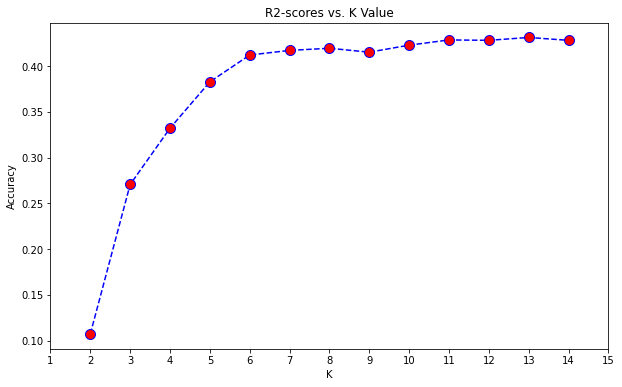

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2-scores vs. K Value')
plt.xticks(range(1,16))
#plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')

In [ ]:
# ACTIVITY 2
# If you think a little bit about it, the number of neighbors might be very important for our results, but will it be the only parameter that matters? 


In [ ]:
# Get and print the R2 score of the model with 6 neighbours.



The R2 for the k-nn model with 6 neighbours is 0.41


In [ ]:
# Train a new k-NN model setting the value of weights = "distance" and keeping 6 neighbours.
# Compare the R2 of both models



The R2 for the k-nn model with 6 neighbours, weighted by distance is 0.42
